# Data Augmentation para balancear clases con SMOTE

Vamos a utilizar el generador de datasets de sklearn

In [1]:
import numpy as np

import keras
from keras import layers
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Create an unbalanced dataset
X, y = make_classification(
    n_samples=1000,  # Total samples
    n_features=20,   # Number of features
    n_informative=15,
    n_redundant=5,
    n_classes=2,     # Binary classification
    weights=[0.95, 0.05],  # 95% class 0, 5% class 1
    random_state=42
)

# Check class distribution
print("Original class distribution:", Counter(y))

# Split the original dataset into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert labels to one-hot encoding
y_train_orig = keras.utils.to_categorical(y_train_orig, 2)
y_test_orig = keras.utils.to_categorical(y_test_orig, 2)


Original class distribution: Counter({np.int64(0): 947, np.int64(1): 53})


Entrenamos un modelo para clasificar este Dataset

In [3]:

# Define the model for the original dataset
model_orig = keras.Sequential([
    layers.Input(shape=(20,)),  # Input layer (20 features)
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 units
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 units
    layers.Dense(2, activation='softmax')  # Output layer (2 classes)
])

# Compile the model
model_orig.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model_orig.summary()

# Train the model
history_orig = model_orig.fit(
    X_train_orig, y_train_orig,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,490 (13.63 KB)

 Trainable params: 3,490 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6023 - loss: 0.8320 - val_accuracy: 0.9500 - val_loss: 0.2968
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9499 - loss: 0.1924 - val_accuracy: 0.9500 - val_loss: 0.2576
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9464 - loss: 0.1787 - val_accuracy: 0.9563 - val_loss: 0.2195
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9684 - loss: 0.1310 - val_accuracy: 0.9500 - val_loss: 0.1990
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9581 - loss: 0.1253 - val_accuracy: 0.9500 - val_loss: 0.1823
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9722 - loss: 0.0826 - val_accuracy: 0.9500 - val_loss: 0.1700
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9695 - loss: 0.0848 - val_accuracy: 0.9500 - val_loss: 0.1604
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9810 - loss: 0.0641 - val_accuracy: 0.9500 - val_loss:

Balanceamos las clases con SMOTE

In [5]:
# Check class distribution
print("Original class distribution:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check new class distribution
print("Balanced class distribution:", Counter(y_balanced))

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)


Original class distribution: Counter({np.int64(0): 947, np.int64(1): 53})
Balanced class distribution: Counter({np.int64(0): 947, np.int64(1): 947})


Original class distribution: Counter({np.int64(0): 947, np.int64(1): 53})
Balanced class distribution: Counter({np.int64(0): 947, np.int64(1): 947})


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,490 (13.63 KB)

 Trainable params: 3,490 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6343 - loss: 0.6862 - val_accuracy: 0.8680 - val_loss: 0.3648
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8979 - loss: 0.2823 - val_accuracy: 0.9274 - val_loss: 0.2340
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9460 - loss: 0.1701 - val_accuracy: 0.9439 - val_loss: 0.1682
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9680 - loss: 0.1250 - val_accuracy: 0.9604 - val_loss: 0.1462
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9777 - loss: 0.0867 - val_accuracy: 0.9571 - val_loss: 0.1218
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9892 - loss: 0.0679 - val_accuracy: 0.9571 - val_loss: 0.1139
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9844 - loss: 0.0548 - val_accuracy: 0.9670 - val_loss: 0.1024
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9907 - loss: 0.0461 - val_accuracy: 0.9703 - val_loss:

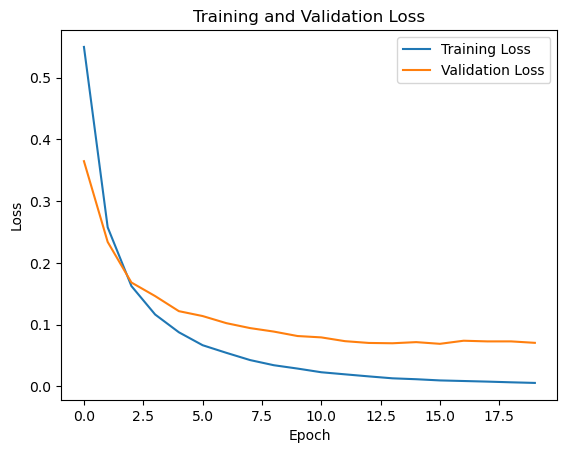

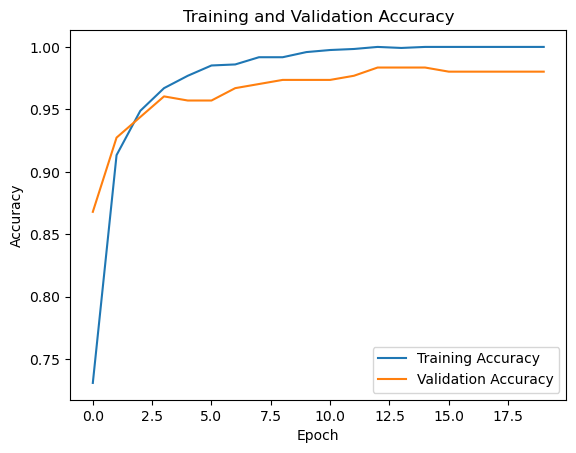

In [ ]:

# Define the model
model = keras.Sequential([
    layers.Input(shape=(20,)),  # Input layer (20 features)
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 units
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 units
    layers.Dense(2, activation='softmax')  # Output layer (2 classes)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

